## KELOMPOK 4 PM RA

1. Muhammad Nabil Azizi (120450090)
2. Rika Ajeng Finatih (121450036)
3. A Rafi Paringgom Iwari (121450039)
4. Annisa Lutfi Alivia (121450093)
5. Elsyah Spryah (121450096)

# **Tugas Kelompok**

Buatlah sebuah pemodelan pendeteksi membedakan sesuatu buah buahan contoh
antara buah semangka dan anggur dengan metode CNN. Untuk Minimal dataset
50%:50% contoh 500 gambar dengan ketentuan 250 anggur dan 250
semangka.(dataset bebas dengan ketentuan tidak boleh sama antar kelompok)
minum akurasi model adalah 70 %.

# Penerapan Convolutional Neural Network (CNN) untuk Identifikasi Hewan Peliharaan: Anjing dan Kucing dengan Dataset Dog vs Cat

## **IMPORT LIBRARY I**

In [ ]:
# Import library yang diperlukan
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## **PENGUMPULAN DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Menentukan path direktori untuk data gambar anjing dan kucing
fig_dog = '/content/drive/MyDrive/Kelompok04_PM_RA/Kel04_RA_PM_Modul04/PetImages/Dog'
fig_cat = '/content/drive/MyDrive/Kelompok04_PM_RA/Kel04_RA_PM_Modul04/PetImages/Cat'

# Membuat list dog_files yang berisi nama file gambar anjing dalam direktori fig_dog
dog_files = os.listdir(fig_dog)
print(dog_files[0:5])  # Mencetak lima nama file gambar anjing pertama
print(dog_files[-5:])  # Mencetak lima nama file gambar anjing terakhir

# Membuat list cat_files yang berisi nama file gambar kucing dalam direktori fig_cat
cat_files = os.listdir(fig_cat)
print(cat_files[0:5])  # Mencetak lima nama file gambar kucing pertama
print(cat_files[-5:])  # Mencetak lima nama file gambar kucing terakhir

# Mencetak jumlah gambar pada data anjing dan kucing
print(f'Jumlah gambar pada data anjing: {len(dog_files)}')
print(f'Jumlah gambar pada data kucing: {len(cat_files)}')


['10399.jpg', '10383.jpg', '10398.jpg', '10424.jpg', '10402.jpg']
['10382.jpg', '10397.jpg', '10385.jpg', '10389.jpg', '10392.jpg']
['10009.jpg', '10016.jpg', '1001.jpg', '100.jpg', '10.jpg']
['10263.jpg', '10270.jpg', '10268.jpg', '1027.jpg', '10269.jpg']
Jumlah gambar pada data dog:1189
Jumlah gambar pada data cat:305


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1] None
1189
305
1494
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


<function matplotlib.pyplot.show(close=None, block=None)>

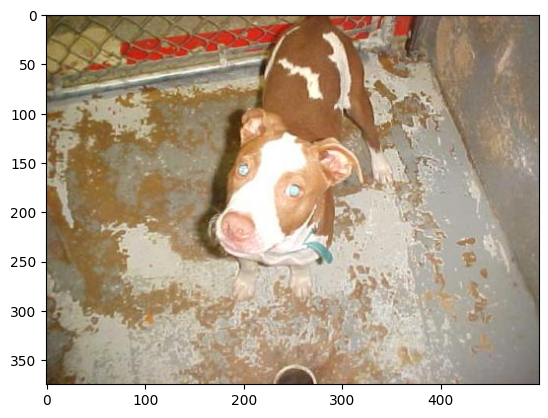

In [ ]:
# Menetapkan label 1 untuk file anjing (diasumsikan sebagai label untuk anjing)
dog_files = [1]*len(dog_files)

# Menetapkan label 0 untuk file kucing (diasumsikan sebagai label untuk kucing)
cat_files = [0]*len(cat_files)

# Mencetak 5 elemen pertama dari dog_files dan cat_files
print(dog_files[0:5], print(cat_files[0:5]))

# Mencetak panjang (jumlah elemen) dari dog_files dan cat_files
print(len(dog_files)), print(len(cat_files))

# Membuat list baru 'labels' dengan menggabungkan dog_files dan cat_files
labels = dog_files + cat_files

# Mencetak panjang (jumlah elemen) dari list 'labels'
print(len(labels))

# Mencetak 5 elemen pertama dan 5 elemen terakhir dari list 'labels'
print(labels[0:5])
print(labels[-5:])


# Membaca file gambar untuk ditampilkan
img = mpimg.imread(fig_dog + '/10226.jpg')

# Menampilkan gambar menggunakan Matplotlib
imgplot = plt.imshow(img)

# Menampilkan plot (gambar)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

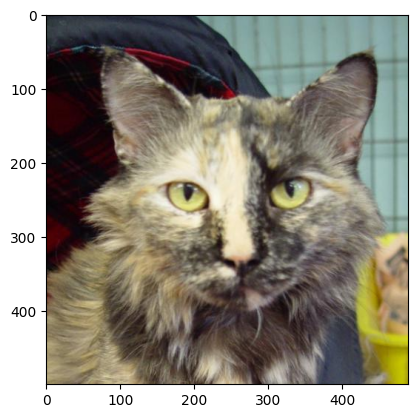

In [ ]:
# Membaca file gambar kucing dengan menggunakan mpimg.imread dari lokasi file yang diberikan
img = mpimg.imread(fig_cat + '/10.jpg')

# Menampilkan gambar yang telah dibaca menggunakan Matplotlib
imgplot = plt.imshow(img)

# Menampilkan plot (gambar)
plt.show()

In [ ]:
data = [] #Buat variabel data untuk menyimpan data gambar.

In [ ]:
dog_files = os.listdir(fig_dog)

for img_file in dog_files :
  image = Image.open(fig_dog + '/' + str(img_file))
  image = image.resize ((128,128)) # Ubah ukuran gambar menjadi 128x128 piksel.
  image = image.convert('RGB') # Ubah format gambar menjadi RGB.
  image = np.array(image) # Ubah gambar menjadi array NumPy.
  data.append(image) # Tambahkan gambar ke variabel data.

In [ ]:
cat_files = os.listdir(fig_cat)

for img_file in cat_files:
  image = Image.open(fig_cat + '/' + str(img_file)) # Buka gambar dari direktori.
  image = image.resize((128,128)) # Ubah ukuran gambar menjadi 128x128 piksel.
  image = image.convert('RGB') # Ubah format gambar menjadi RGB.
  image = np.array(image) # Ubah gambar menjadi array NumPy.
  data.append(image) # Tambahkan gambar ke variabel data.

In [ ]:
type(data), len(data) #Baris kode ini bertujuan untuk mengetahui tipe data (type) dari variabel data dan panjang (jumlah elemen) dari variabel data

(list, 1494)

In [ ]:
data[0] # melakukan pengaksesan index dalam data

array([[[211, 213, 199],
        [211, 213, 199],
        [211, 213, 199],
        ...,
        [ 97,  71,  36],
        [ 97,  71,  36],
        [102,  73,  37]],

       [[211, 213, 199],
        [211, 213, 199],
        [211, 213, 199],
        ...,
        [ 98,  72,  38],
        [ 98,  72,  38],
        [100,  75,  39]],

       [[211, 213, 199],
        [211, 213, 199],
        [211, 213, 199],
        ...,
        [ 99,  73,  41],
        [ 99,  73,  41],
        [ 97,  74,  41]],

       ...,

       [[121, 129,  64],
        [119, 126,  64],
        [119, 125,  65],
        ...,
        [107, 115,  46],
        [117, 126,  57],
        [123, 133,  62]],

       [[114, 120,  59],
        [124, 130,  71],
        [117, 122,  65],
        ...,
        [116, 122,  52],
        [109, 120,  48],
        [ 98, 112,  39]],

       [[124, 130,  69],
        [129, 135,  76],
        [110, 115,  58],
        ...,
        [111, 118,  48],
        [ 92, 103,  31],
        [ 86,  99,  27]]

## **PREPROCESSING DATA**

In [ ]:
# converting image list and label list to numpy arrays
x = np.array(data) # Konversi daftar gambar ke array NumPy.
y = np.array(labels) #Konversi daftar label ke array NumPy.

In [ ]:
# Memisahkan dataset menjadi subset pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Mencetak bentuk (shape) dari dataset asli, subset pelatihan, dan subset pengujian
print(x.shape, x_train.shape, x_test.shape)


(1494, 128, 128, 3) (1195, 128, 128, 3) (299, 128, 128, 3)


In [ ]:
# Melakukan penskalaan fitur pada x_train. Nilai piksel dikonversi ke rentang antara 0 dan 1.
x_train_scaled = x_train/255

# Melakukan penskalaan fitur pada x_test. Nilai piksel dikonversi ke rentang antara 0 dan 1.
x_test_scaled = x_test/255

# Mencetak nilai piksel dari citra pertama dalam x_train sebelum dan sesudah penskalaan.
x_train[0], x_train_scaled[0]


(array([[[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [ 64,  68,  85],
         [ 64,  70,  86],
         [ 63,  70,  87]],
 
        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [ 66,  70,  87],
         [ 65,  68,  85],
         [ 62,  69,  86]],
 
        [[251, 251, 251],
         [251, 251, 251],
         [251, 251, 251],
         ...,
         [ 66,  69,  88],
         [ 65,  68,  87],
         [ 63,  68,  87]],
 
        ...,
 
        [[ 75, 101,  76],
         [ 63,  87,  62],
         [ 43,  68,  41],
         ...,
         [ 63,  88,  69],
         [ 57,  81,  62],
         [ 65,  88,  68]],
 
        [[ 61,  91,  64],
         [ 58,  86,  57],
         [101, 127,  97],
         ...,
         [ 99, 124, 105],
         [101, 126, 106],
         [ 96, 120,  99]],
 
        [[ 89, 118,  89],
         [ 66,  97,  65],
         [103, 133, 102],
         ...,
         [ 68,  90,  73],
  

## **PERANCANGAN MODEL I**

In [ ]:
num_of_classes = 2

model = keras.Sequential() # Buat objek model jaringan saraf.

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) # Tambahkan lapisan convolutional pertama dengan 32 filter, ukuran kernel 3x3, dan aktivasi ReLU.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # ambahkan lapisan pooling maksimum pertama dengan ukuran kolam 2x2.

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # Tambahkan lapisan convolutional kedua dengan 64 filter, ukuran kernel 3x3, dan aktivasi ReLU.
model.add(keras.layers.MaxPooling2D(pool_size=(2,2))) # Tambahkan lapisan pooling maksimum kedua dengan ukuran kolam 2x2.

model.add(keras.layers.Flatten()) # Rata-ratakan output dari lapisan convolutional.

model.add(keras.layers.Dense(128, activation='relu')) #Tambahkan lapisan fully connected pertama dengan 128 neuron dan aktivasi ReLU.
model.add(keras.layers.Dropout(0.5)) # Tambahkan lapisan dropout dengan tingkat dropout 0,5.

model.add(keras.layers.Dense(64, activation='relu')) # Tambahkan lapisan fully connected kedua dengan 64 neuron dan aktivasi ReLU.
model.add(keras.layers.Dropout(0.5)) # Tambahkan lapisan dropout dengan tingkat dropout 0,5.

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #Tambahkan lapisan output dengan 2 neuron (untuk klasifikasi biner) dan aktivasi sigmoid.

## **PELATIHAN MODEL I**

In [ ]:
# compile the neural network
# kode dibawah ini menjelaskan bahwa baris ini berfungsi untuk mengkompilasi model jaringan saraf sebelum dilakukan pelatihan. Fungsi compile mengatur konfigurasi model untuk pelatihan, termasuk pemilihan optimizer, fungsi kerugian, dan metrik evaluasi.
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['acc'])
#traning the neural network
# kode dibawah ini menjelaskan bahwa baris ini digunakan untuk melatih model jaringan saraf pada dataset pelatihan
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15) # Latih model pada data pelatihan dengan pembagian validasi 0,1 dan 15 epoch.

Epoch 1/15
34/34 [==============================] - 30s 859ms/step - loss: 0.6508 - acc: 0.7553 - val_loss: 0.4641 - val_acc: 0.8250
Epoch 2/15
34/34 [==============================] - 27s 789ms/step - loss: 0.5299 - acc: 0.7953 - val_loss: 0.4641 - val_acc: 0.8250
Epoch 3/15
34/34 [==============================] - 31s 900ms/step - loss: 0.5273 - acc: 0.7935 - val_loss: 0.4653 - val_acc: 0.8250
Epoch 4/15
34/34 [==============================] - 26s 781ms/step - loss: 0.5026 - acc: 0.7944 - val_loss: 0.4350 - val_acc: 0.8250
Epoch 5/15
34/34 [==============================] - 26s 752ms/step - loss: 0.4814 - acc: 0.7935 - val_loss: 0.4438 - val_acc: 0.8250
Epoch 6/15
34/34 [==============================] - 26s 771ms/step - loss: 0.4547 - acc: 0.7953 - val_loss: 0.4493 - val_acc: 0.8250
Epoch 7/15
34/34 [==============================] - 27s 787ms/step - loss: 0.4130 - acc: 0.8019 - val_loss: 0.4681 - val_acc: 0.8250
Epoch 8/15
34/34 [==============================] - 26s 768ms/step - 

## **PENGUJIAN MODEL I**

10/10 [==============================] - 2s 163ms/step - loss: 1.1144 - acc: 0.7525
Test Accuracy = 0.7525083422660828


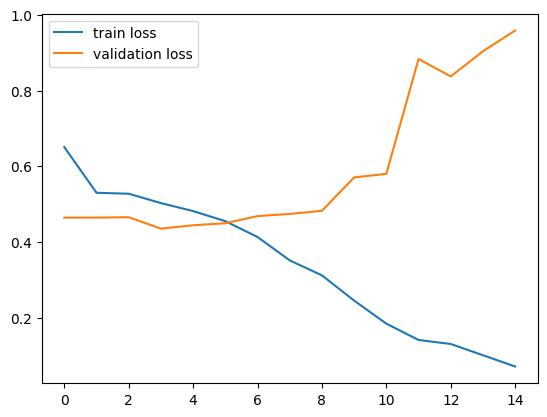

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test) #Evaluasi model pada data pengujian dan simpan nilai loss dan accuracy.
print('Test Accuracy =', accuracy) #Tampilkan nilai accuracy tes.
h = history

# plot the loss value
plt.plot(h.history['loss'], label ='train loss') #Plot kurva loss pelatihan.
plt.plot(h.history['val_loss'], label = 'validation loss') #Plot kurva loss validasi.
plt.legend() #Tambahkan legenda untuk kurva loss.
plt.show() #Tampilkan plot kurva loss.

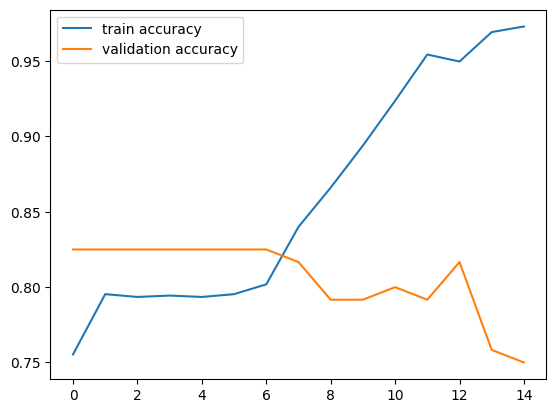

In [ ]:
# plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy') #Plot kurva accuracy pelatihan.
plt.plot(h.history['val_acc'], label = 'validation accuracy') #Plot kurva accuracy validasi.
plt.legend() #Tambahkan legenda untuk kurva accuracy.
plt.show() #Tampilkan plot kurva accuracy.

## **PREDIKSI I**

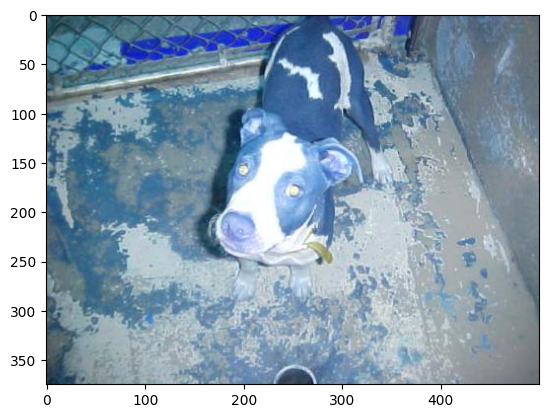

In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_dog = fig_dog + '/10226.jpg' # membaca jalur gambar yang ingin diprediksi. Jika baris komentar dihapus, program akan meminta pengguna untuk memasukkan jalur gambar secara manual.
input_image = cv2.imread(input_image_dog) # membaca gambar dari jalur yang ditentukan.

imgplot = plt.imshow(input_image) # menampilkan gambar yang telah dibaca
plt.show() #menampilkan plot

In [ ]:
# Mengubah ukuran gambar input menjadi 128x128 piksel menggunakan OpenCV (cv2)
input_image_resized = cv2.resize(input_image, (128, 128))

# Melakukan penskalaan nilai piksel ke dalam rentang 0 hingga 1
input_image_scaled = input_image_resized / 255.0

# Mereshape array gambar menjadi bentuk yang sesuai untuk digunakan sebagai input pada model
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Melakukan prediksi menggunakan model pada gambar yang telah diubah
input_prediction = model.predict(input_image_reshaped)


1/1 [==============================] - 0s 28ms/step


In [ ]:
print(input_prediction) # menampilkan hasil prediksi

[[0.01892574 0.9836993 ]]


In [ ]:
input_pred_label = np.argmax(input_prediction) #mendapatkan label prediksi dengan menemukan indeks elemen terbesar dalam output prediksi.

print(input_pred_label) #mencetak label prediksi untuk gambar input.

if input_pred_label == 1: #Jika input_pred_label adalah 1, maka daun dalam gambar terkena hama.
  print('Gambar tersebut adalah dog') #mencetak pesan yang menginformasikan apakah daun dalam gambar terkena hama atau tidak.
else: # Jika input_pred_label adalah 0, maka daun dalam gambar tidak terkena hama.
  print('Gambar tersebut adalah cat')

1
Gambar tersebut adalah dog


## **IMPORT LIBRARY II**

In [ ]:
import tensorflow_hub as hub #mengimport library TensorFlow Hub, yang digunakan untuk memuat model yang telah dilatih sebelumnya.

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' #mendefinisikan URL untuk model Mobilenet yang akan digunakan sebagai lapisan pertama dari model baru.
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape =(128, 128, 3), trainable=False) #memuat model Mobilenet dari URL yang ditentukan dan mengonversinya menjadi lapisan Keras. Parameter trainable=False mengindikasikan bahwa model Mobilenet tidak akan dilatih ulang selama proses pelatihan model baru.

## **PERANCANGAN CNN II**

In [ ]:
import tensorflow as tf

# Membuat model menggunakan Sequential API dari TensorFlow Keras
model = tf.keras.Sequential([
    # Input layer dengan ukuran (128, 128, 3)
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),

    # Lambda layer untuk mengubah ukuran gambar menggunakan tf.image.resize
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),

    # Menambahkan pretrained_model ke dalam model
    pretrained_model,

    # Menambahkan layer Dense dengan jumlah neuron sesuai dengan num_of_classes
    tf.keras.layers.Dense(num_of_classes)
])

# Menampilkan ringkasan (summary) dari model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_13 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## **PELATIHAN MODEL II**

In [ ]:
model.compile( #mengkompilasi model dengan mengonfigurasi pengoptimal (adam), fungsi loss (sparse_categorical_crossentropy), dan metrik (acc).
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=15) #melatih model pada data pelatihan yang telah disesuaikan ukurannya (x_train_scaled) dan label pelatihan (y_train) selama 15 epoch.

Epoch 1/15
38/38 [==============================] - 42s 990ms/step - loss: 0.2265 - acc: 0.9130
Epoch 2/15
38/38 [==============================] - 37s 985ms/step - loss: 0.0671 - acc: 0.9808
Epoch 3/15
38/38 [==============================] - 39s 1s/step - loss: 0.0433 - acc: 0.9916
Epoch 4/15
38/38 [==============================] - 39s 1s/step - loss: 0.0356 - acc: 0.9933
Epoch 5/15
38/38 [==============================] - 37s 982ms/step - loss: 0.0282 - acc: 0.9925
Epoch 6/15
38/38 [==============================] - 37s 982ms/step - loss: 0.0222 - acc: 0.9967
Epoch 7/15
38/38 [==============================] - 37s 986ms/step - loss: 0.0185 - acc: 0.9983
Epoch 8/15
38/38 [==============================] - 38s 998ms/step - loss: 0.0165 - acc: 0.9992
Epoch 9/15
38/38 [==============================] - 39s 1s/step - loss: 0.0131 - acc: 0.9992
Epoch 10/15
38/38 [==============================] - 38s 997ms/step - loss: 0.0114 - acc: 0.9992
Epoch 11/15
38/38 [=============================

## **EVALUASI DAN PREDIKSI II**

In [ ]:
#mengevaluasi model pada data pengujian yang telah disesuaikan ukurannya (x_test_scaled) dan label pengujian (y_test). Fungsi model.evaluate() mengembalikan nilai loss dan accuracy sebagai tuple.
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}') #mencetak nilai accuracy yang diperoleh dari evaluasi model pada data pengujian.

10/10 [==============================] - 9s 872ms/step - loss: 0.0489 - acc: 0.9799
Test Loss = 0.04885237291455269
Test Accuracy = 0.9799330830574036


## **PSEUDOCODE**

    # Mount Google Drive
    drive.mount('/content/drive')

    # Definisi path untuk dataset gambar anjing dan kucing
    fig_dog = '/content/drive/MyDrive/Kelompok04_PM_RA/Kel04_RA_PM_Modul04/PetImages/Dog'
    fig_cat = '/content/drive/MyDrive/Kelompok04_PM_RA/Kel04_RA_PM_Modul04/PetImages/Cat'

    # Membaca nama file gambar anjing dan kucing
    dog_files = daftar_file(fig_dog)
    cat_files = daftar_file(fig_cat)

    # Menentukan label untuk gambar anjing dan kucing
    label_anjing = tetapkan_label(dog_files, 1)
    label_kucing = tetapkan_label(cat_files, 0)

    # Menggabungkan file dan label
    semua_file = gabung_list(dog_files, cat_files)
    semua_label = gabung_list(label_anjing, label_kucing)

    # Memuat dan mengolah gambar
    data = muat_dan_proses_gambar(semua_file)

    # Konversi label dan gambar ke dalam bentuk array NumPy
    x, y = konversi_ke_array_numpy(data, semua_label)

    # Pembagian dataset menjadi data pelatihan dan pengujian
    x_pelatihan, x_pengujian, y_pelatihan, y_pengujian = bagi_dataset(x, y, ukuran_pengujian=0.2, seed_acak=42)

    # Membuat model jaringan saraf
    model = buat_model_jaringan_saraf()

    # Kompilasi model
    kompilasi_model(model, pengoptimal='adam', kerugian='sparse_categorical_crossentropy', metrik=['akurasi'])

    # Pelatihan model
    latih_model(model, x_pelatihan, y_pelatihan, pembagian_validasi=0.1, epoch=15)

    # Evaluasi model pada dataset pengujian
    evaluasi_model(model, x_pengujian, y_pengujian)

    # Prediksi gambar
    gambar_input = baca_gambar_input(fig_dog + '/10226.jpg')
    gambar_diubah = ubah_ukuran_gambar(gambar_input, (128, 128))
    gambar_diskalakan = skalakan_gambar(gambar_diubah)
    gambar_direshape = bentuk_ulang_gambar(gambar_diskalakan)
    prediksi = prediksi_gambar(model, gambar_direshape)

    # Menampilkan hasil prediksi
    tampilkan_hasil_prediksi(prediksi)
    ## inggom
